# 同花顺行业概念信息

In [1]:

import pandas as pd

fpath = r'../../JohnsonUtil\wencai\同花顺板块行业.xls'
thsgn = pd.read_excel(fpath)
thsgn = thsgn.set_index('股票代码')

## 查询信息

In [2]:
thsgn[:1]
thsgn.columns
thsgn.loc['002670.SZ']

股票简称                                                                 国盛金控
现价(元)                                                                9.46
涨跌幅(%)                                                               0.96
主营产品名称                  电源输入组件||电热电器电源输入组件||冰洗电器电源输入组件||空调电源输入组件||空调连接...
所属概念                    深股通;区块链;转融券标的;富时罗素概念;富时罗素概念股;消费金融;标普道琼斯A股;融资融券...
所属同花顺行业                                                       非银金融-证券-证券Ⅲ
经营范围                    控股公司服务，股权投资，投资管理与咨询；金融信息服务；科技中介服务，技术推广服务，软件开发，...
公司网站                                                       www.gsfins.com
所属概念数量(个)                                                              11
a股流通市值 (元)2023.01.31                                          15356897000
Name: 002670.SZ, dtype: object

# Debug开启

In [69]:

# Delete Jupyter notebook root logger handler
# Set Debug
import logging
import sys

# %matplotlib inline
%matplotlib widget
# stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# # # reload(sys)
# # # sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# stdout = sys.stdout
# sys.path.append('../')
# import JSONData.tdx_data_Day as tdd
# sys.stdout = stdout


mylogger = logging.getLogger()
if len(mylogger.handlers) > 0:
    for ix in mylogger.handlers:
        print("handlers:%s std:%s" % (ix.stream, sys.stdout))
else:
    print("nb not handlers")
#     mylogger.propagate = False
mylogger.setLevel(logging.ERROR)
# mylogger.setLevel(logging.DEBUG)

print("nb:", sys.stderr)
# # Create logger as usual
import nest_asyncio

nest_asyncio.apply()

handlers:<ipykernel.iostream.OutStream object at 0x000001C47A3943D0> std:<ipykernel.iostream.OutStream object at 0x000001C47A394F40>
handlers:<_io.TextIOWrapper name='G:\\stock.log.2023-02-03.log' mode='a+' encoding='cp936'> std:<ipykernel.iostream.OutStream object at 0x000001C47A394F40>
nb: <ipykernel.iostream.OutStream object at 0x000001C47A3943D0>


# TDX多日数据分析

## 定义 TDX-Path

In [70]:
# encoding:utf-8
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
# InteractiveShell.ast_node_interactivity = "last_expr"

import sys

import pandas as pd
from pandas import HDFStore

stdi, stdo, stde = sys.stdin, sys.stdout, sys.stderr
# print(stdi, stdo, stde)
# reload(sys)
# sys.setdefaultencoding('utf-8')
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# print(sys.stdout,sys.stderr,sys.stderr)

# print(stdi, stdo, stde)

# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

In [71]:
sys.path.append("../../")
import JSONData.tdx_data_Day as tdd
# import win_unicode_console
from JohnsonUtil import commonTips as cct
from JSONData import sina_data

# import nest_asyncio
# nest_asyncio.apply()
# 查阅资料后发现，发现使用 jupyter notebook 环境，其连接着 IPython 内核，而 IPython 内核本身在事件循环上运行，而 asyncio 不允许嵌套其事件​​循环，因此会出现如上图的错误信息。
# nest_asyncio 作为异步操作的补丁而存在，具体内容请参考
# win_unicode_console.disable()
tdx_path = "G:\\tdx_last_df.h5"
sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
sina_d_path = "G:\\sina_data.h5"
sina_dd_path = "G:\\get_sina_all_dd.h5"
# print(stdi, stdo, stde)
sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde

# # 显示所有列
pd.set_option("display.max_columns", None)
# # 显示所有行
# pd.set_option('display.max_rows', None)
# # 设置 value 的显示长度为 100，默认为 50
# pd.set_option('max_colwidth',100)
# pd.set_option?
# df.columns.tolist()

In [72]:
cct.code_to_symbol_ths('000002')

'000002.SZ'

### 功能定义

In [73]:
def readHdf5(fpath, root=None):
    store = pd.HDFStore(fpath, "r")
    print(store.keys())
    if root is None:
        root = store.keys()[0].replace("/", "")
    df = store[root]
    store.close()
    return df


def write_code_to_blk(codew, blk='090'):
    block_path = tdd.get_tdx_dir_blocknew() + '%s.blk' % (blk)
    write_blk = 'n'
    write_blk = cct.cct_raw_input("write blk [Y] or [N]:")
    if write_blk == 'y' or write_blk == 'Y':
        hdf5_wri = cct.cct_raw_input(
            "Rewrite code [Y] or append [N](defalut:N):")
        if hdf5_wri == 'y' or hdf5_wri == 'Y':
            append_status = False
        else:
            append_status = True
        if len(codew) > 3:
            cct.write_to_blocknew(block_path, codew, append_status,
                                  doubleFile=False, keep_last=0)
            ("write:%s block_path:%s" % (len(codew), block_path))
        else:
            ("write error:%s block_path:%s" % (len(codew), block_path))


def show_tdx_data(df, codelist=None, market_value='3', col=None):
    print("Count:%s %s" % (df.shape))
    columns_ = ["name", "category", "close", "percent", 'topR', "lastp1d", "ma5dcum", "ma20d", "fib",
                "fibl", "df2", "per1d", "hmax", "lmin", "per%sd" % (market_value), "perc%sd" % (market_value)]
    if col is not None:
        columns_.insert(4, col)

    if codelist is None:
        temp = df.loc[:, columns_]
    else:
        temp = df.loc[[x for x in codelist if x in df.index], columns_]
    return temp


def compute_perd_value(df, market_value=3, col="per"):

    # if market_value == None or market_value < "2":
    #     market_value = 3
    # if market_value > 1 and len(df[ df["%s%sd" % (col, market_value)] > 2])   :
    market_value = str(market_value)
    if market_value > str(1):
        temp = df[
            df.columns[
                (df.columns >= "%s1d" % (col)) &
                (df.columns <= "%s%sd" % (col, market_value))
            ]
        ]

        df['%s%sd' % (col, market_value)] = temp.T.sum().apply(
            lambda x: round(x, 1))
    else:
        print("market_value <= 1,No Compute")

    return df


def clean_688(df):
    df = df[(~df.index.str.contains("688"))]
    return df


from collections import Counter, OrderedDict


def counterCategory(df):
    top5 = dict()
    if len(df) > 0:
        categoryl = df.category[:20].tolist()
        dicSort = []
        for i in categoryl:
            if isinstance(i, str):
                # dicSort.extend([ co.decode('utf8') for co in i.split(';')])
                dicSort.extend(i.split(';'))
                # cate_list = i.split(';')
                # for co in cate_list:
                #     dicSort.append(to_str(co))
        topSort = Counter(dicSort)
        top5 = OrderedDict(topSort.most_common(5))
        # for i in top5.keys():
        # print(i, top5[i]),
        # print('')
    return top5


def get_runtime_percent(df, perd=None):
    if "percent" not in df.columns and "lastp1d" in df.columns:
        # print('init percent')
        df = df.fillna(0)
        df['percent'] = list(
            map(
                lambda x, y, z: round((x - y) / y * 100, 1)
                if x != y else round((x - z) / z * 100, 1),
                df.close, df.lastp1d, df.lastp2d))
        # df['percent'] = df.apply(lambda x: round((x.close - x.lastp1d) /(x.lastp1d) * 100, 1),axis=1)
    # else:
    #     print('Percent in columns')
    if not perd is None:
        df[perd] = list(map(lambda x, y: round((x + y), 1)
                            if int(y) > 0 else 0, df.perd, df.percent))
    return df


def get_realtime_ratio(df, market='all'):
    if 'ratio' in df.columns:
        df.drop('ratio', axis=1, inplace=True)
    ratio_df = tdd.getSinaJsondf(market)
    df = cct.combine_dataFrame(
        df, ratio_df.ratio, col=None, compare=None, append=False, clean=False)
    return df

### 还原Cell输出信息

In [74]:
# sys.stdin, sys.stdout, sys.stderr = stdi, stdo, stde
# print(stdi, stdo, stde)

## 初始化 hdf5的tdx数据

In [75]:

market_value = "3"
df = readHdf5(tdx_path)
df = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
df = compute_perd_value(df, market_value, "perc")
df = compute_perd_value(df, market_value, "per")

df = get_realtime_ratio(df)
# df=get_runtime_percent(df)

df = get_runtime_percent(df, "per%sd" % (market_value))

# filter 科创
df = clean_688(df)

df.shape
df[-1:].percent
df[~(df.last6vol > 0)][:10].last6vol
df.ratio[-2:]

['/low_d_60_y_all', '/low_w_180_y_all']


(2518, 119)

code
002190    10.0
Name: percent, dtype: float64

Series([], Name: last6vol, dtype: float64)

code
300135    25.5
002190    19.0
Name: ratio, dtype: float64

## 个股数据查看

In [10]:
df.loc[["603068", '601377', '000725'],
       ["date", "name", "category", "percent", "close", "lastp1d", "ma5d",
        "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
        "ra", "ral", "vcall", "vcra", "vchange", "lvol", 'lv', 'lowvol',
        'last6vol', 'per%sd' % (market_value),
        'perc%sd' % (market_value),
        'perc4d']][: 3]

KeyError: "['601377'] not in index"

In [ ]:

sort_key2 = "per%sd" % (market_value)
df = df.sort_values(
    by=["perc%sd" % (market_value), sort_key2, "fib"], ascending=[0, 0, 1]
)
show_tdx_data(df)[: 5]

show_tdx_data(df)[-5:]
# df = df.sort_values(by=['perc%sd'%(market_value), 'per%sd'%(market_value),'fib'],ascending=[0,0,1])

## filter 20D 涨幅榜 

In [11]:
# df = df[(df['close'] > df['ma20d'] * 0.98) & (df['close'] < df['ma20d'] * 1.03)]
f20df = df[(df['close'] > df['ma20d'] * 0.98) &
           (df['df2'] > 0) & (df['lastp1d'] > df['ma5d']) & (df['lasth1d'] >= df['lasth2d']) ]

f20df.shape
show_tdx_data(f20df)[: 3]
show_tdx_data(f20df)[-3:]

(730, 119)

Count:730 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,
000935,四川双马,股权转让;西部开发;MSCI概,24.86,-1.9,0.0,25.35,23.3,22.82,60.0,9.0,3.0,-1.4,24.68,21.91,0.0,3.1
603200,上海洗霸,污水处理;新股与次新股,25.90,5.8,2.0,24.48,19.5,19.18,20.0,6.0,6.0,2.1,20.62,17.75,7.9,3.3
300466,赛摩智能,智能物流;工业4.0;机器人概,5.93,-2.1,0.0,6.06,4.9,4.89,20.0,9.0,3.0,-2.7,5.30,4.65,0.0,3.2


Count:730 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,
600071,凤凰光学,仪电仪表;地沟油概念;地方国资,25.99,4.2,0.0,24.95,23.3,22.87,53.0,9.0,5.0,4.1,24.47,22.51,8.3,3.0
300135,宝利国际,公共交通;沥青;航空航天,3.65,-2.9,1.0,3.76,2.9,2.90,58.0,7.0,6.0,10.0,3.38,2.73,0.0,3.2
002190,成飞集成,新能源;央企国资改革;新能源汽,31.49,10.0,2.0,28.63,23.0,24.82,10.0,9.0,2.0,-4.0,28.17,20.52,6.0,3.2


In [12]:

sort_key2 = "per%sd" % (market_value)

f20df = f20df.sort_values(
    by=[sort_key2, "perc%sd" % (market_value), "fib"], ascending=[0, 0, 1]
)
f20df.shape
show_tdx_data(f20df)[: 5]

show_tdx_data(f20df)[-5:]


# df.loc[:, ["name"]].T

(730, 119)

Count:730 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,
300250,初灵信息,三网融合;G20峰会;智能家居,18.80,12.0,1.0,16.79,11.6,11.73,21.0,9.0,2.0,10.0,12.93,10.93,22.0,3.3
002167,东方锆业,稀有金属;央企国资改革;中澳自,8.80,10.0,2.0,8.00,6.3,6.30,43.0,9.0,2.0,10.0,6.29,6.02,20.0,3.3
002362,汉王科技,虹膜识别;指纹技术;电子纸,26.96,10.0,4.0,24.51,17.6,17.56,46.0,7.0,13.0,10.0,21.27,16.25,20.0,3.3
605089,味知香,核准制次新股 ;新股与次新股,79.05,7.5,0.0,73.56,67.2,68.79,60.0,3.0,5.0,10.0,73.08,63.33,17.5,2.1
300571,平治信息,在线教育;手机游戏;数字阅读,37.10,12.1,0.0,33.09,29.8,29.58,20.0,8.0,1.0,5.2,34.57,28.89,17.3,3.2


Count:730 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,
300789,唐源电气,新股与次新股 ;轨道交通 ;高,23.26,1.3,1.0,22.96,21.0,19.84,19.0,9.0,9.0,-2.3,20.13,17.68,-1.0,3.2
301248,杰创智能,数据中心 ;融资融券 ;转融券,32.32,1.0,0.0,31.99,30.3,30.82,28.0,8.0,7.0,-2.4,32.46,28.91,-1.4,3.1
300845,捷安高科,虚拟现实 ;轨道交通 ;国产软,21.00,2.2,0.0,20.54,18.5,18.80,19.0,7.0,2.0,-3.9,26.03,17.60,-1.7,3.2
002253,川大智胜,人工智能;全息手机;车联网,16.82,2.0,1.0,16.49,13.2,13.08,20.0,9.0,4.0,-3.7,16.07,12.11,-1.7,3.2
000026,飞亚达,央企国资改革;军工;奢侈品,12.82,2.6,0.0,12.49,11.6,11.23,60.0,9.0,9.0,-4.7,11.48,10.29,-2.1,3.1


In [13]:
code = ["000725"]
f20df.loc[code,
          ["name", "close", "percent", "lastp1d", "ma5dcum", "ma20d", "fib",
           "fibl", "ra", "df2", "per1d", "hmax", "lmin", "per%sd" %
           (market_value),
              "perc%sd" % (market_value)]]

KeyError: "None of [Index(['000725'], dtype='object', name='code')] are in the [index]"

## Write code to blk 

In [14]:


# codew = df.index.tolist()
# write_code_to_blk(codew)

# TDX参数数据信息

In [15]:
# code = '002670'
# tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# tdf.dropna(inplace=True)
# tdf.loc[:, ["close", "ma5d", "ma10d",
#             "ma20d", "upper", "lower", "hmax", "lmin"]].plot()
# tdf = compute_perd_value(tdf, market_value, "per")

# 实时sina_MultiIndex 分析

## 初始化当日Multi

In [16]:
# ohlc_dict = {'open': 'first',
#              'high': 'max',
#              'low': 'min',
#              'close': 'last'}

ohlc_dict = {
    'volume': 'sum',
    'high': 'max',
    'low': 'min',
    'close': 'last'}


def minmax_norm(df):
    return ((df - df.min()) / (df.max() - df.min())).apply(lambda x: round(x, 2))

# def apply_round(df):
#     return df.apply(lambda x:round(x,2))


import pandas as pd
from pandas import HDFStore

# sina_MultiD_path = "G:\\sina_MultiIndex_data.h5"
# freq='30T'
# startime = '09:25:00'
# endtime = '15:01:00'
# def readHdf5(fpath, root=None):
#     store = pd.HDFStore(fpath, "r")
#     print((store.keys()))
#     if root is None:
#         root = list(store.keys())[0].replace("/", "")
#     df = store[root]
#     store.close()
#     return df

h5 = readHdf5(sina_MultiD_path)
print(sina_MultiD_path)
h5.shape
# h5[:1]
code_muti = '600519'
h5.loc[code_muti][:2]
h5.loc[code_muti][-1:]

['/all_10']
G:\sina_MultiIndex_data.h5


(2007785, 6)

,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-02-03 09:25:44,1820.0,1820.0,1820.0,1836.11,27200,1820.0
2023-02-03 09:30:41,1820.0,1826.0,1819.0,1836.11,91065,1820.0


,close,high,low,llastp,volume,lastbuy
ticktime,,,,,,
2023-02-03 15:00:00,1818.0,1826.0,1795.68,1836.11,3494490,1813.7


## Now freq = 'D' 总量占比

In [17]:
# h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
# h5_ohlc_Day = h5_ohlc.groupby(pd.Grouper(
#     freq='1D', closed='right', label='right')).agg(
#     ohlc_dict).dropna()
# freq = '30T'
freq = 'D'
startime = '09:25:00'
endtime = '15:01:00'

time_ratio = cct.get_work_time_ratio()

run_col = ['close', 'volume']
mdf = cct.get_limit_multiIndex_freq(
    h5, freq=freq.upper(),
    col=run_col, start=startime, end=endtime, code=None)
allvol = mdf.volume.sum()
allvol / 1000 / 1000 / 1000
mdf.loc['002195'].volume / mdf.loc['600705'].volume
ndf = mdf.copy()
ndf.info(show_counts=True)
ndf.describe()

17227.218533497

ticktime
2023-02-04    0.819115
Freq: D, Name: volume, dtype: float64

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4910 entries, ('000001', Timestamp('2023-02-04 00:00:00', freq='D')) to ('689009', Timestamp('2023-02-04 00:00:00', freq='D'))
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   4910 non-null   float64
 1   volume  4910 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 258.6+ KB


,close,volume
count,4910.000000,4.910000e+03
mean,24.666629,3.508598e+09
std,46.665547,6.879715e+09
min,0.000000,0.000000e+00
25%,6.838054,5.609012e+08
50%,13.302438,1.433546e+09
75%,26.112707,3.634891e+09
max,1810.023547,1.355174e+11


### TDX filter Vol and fibl

####  9日交易量nvol_idx 

In [18]:
# 9日交易量Mean
temp = df[df.columns[((df.columns >= 'lastv1d') & (df.columns <= 'lastv9d'))]]
temp.shape, temp.columns
temp['volmean'] = temp.mean(axis=1)
# temp[:1]
temp['volnow'] = round(temp['lastv1d'] / temp['volmean'], 2)
nvol_idx = temp.sort_values(by=['volnow'], ascending=[0])
# nvol_idx.index
nvol_idx.loc[:, ['volnow']].T[:20]
df = get_realtime_ratio(df)

show_tdx_data(df, nvol_idx.index[:20], col='ratio').T
nvol_idx.shape

((2518, 9),
 Index(['lastv1d', 'lastv2d', 'lastv3d', 'lastv4d', 'lastv5d', 'lastv6d',
        'lastv7d', 'lastv8d', 'lastv9d'],
       dtype='object'))

code,300293,300414,002167,300250,605006,300211,300949,600736,300466,603909,300591,300135,002819,000070,300441,600301,600768,601236,300983,002708,600819,600063,000806,600720,002253,301277,000533,300048,300084,300580,002571,600297,300571,000735,002536,001266,600211,399001,603200,000599,300044,600070,002534,000065,300530,301318,301288,603656,603639,600767,600783,600195,601020,000681,300276,300509,300077,605268,600216,300822,399005,600683,000409,002092,000949,605258,600084,300802,605155,002403,301206,301270,399006,002644,002197,001338,300479,600573,600570,300846,002064,603170,603219,300131,600053,300184,002889,600305,300785,603239,300459,300624,002787,605189,002969,603739,605222,603398,300531,002613,000151,000935,300286,600428,603087,300126,605507,300609,000541,002243,000004,002248,002190,000795,301289,300222,300891,603117,300052,003010,002499,300002,300870,300552,300779,301163,603057,300112,301312,300845,301001,600209,002177,002371,001313,300810,605089,002127,600289,600071,301169,301178,300413,603893,603011,002808,002951,002488,600032,000931,300840,002011,002778,300752,002330,300690,300421,603017,301042,301077,300486,603681,300614,605020,002230,301038,301085,300488,300547,002986,603466,300839,603626,300474,300892,603301,603258,301006,002691,301363,603991,300844,300348,603132,300858,300792,002577,000509,002077,300756,002369,603507,605016,600091,600619,301025,601579,300977,300201,002696,603235,002429,600432,301330,600176,300767,002876,605168,603066,603869,002882,300946,002921,300770,002945,001308,600604,600818,000715,301208,002767,600693,300140,600847,605180,300295,605033,300981,003026,301195,600200,300887,300809,002119,600409,300964,300190,002967,301039,301093,300652,301116,002199,300129,301052,300573,603324,603900,301196,301000,002287,300835,300812,600172,300911,605166,600696,605186,000035,300901,002277,300054,301121,002695,300353,300923,002999,600425,300915,300313,001217,001317,601117,600687,001318,603380,300011,001288,301066,000571,300895,605319,600889,300297,300563,300076,002755,301130,000544,300873,603118,300942,300702,002602,301135,002737,300781,603660,603931,002552,301132,002173,002189,002298,301200,300606,600963,300791,001211,300350,300475,301302,002930,300889,300641,300471,301396,601222,002559,301227,300200,001205,000821,300332,600980,301018,002978,301161,300456,301278,002741,600277,300909,603078,300857,600114,300623,000550,301041,002706,000672,600145,300538,600760,002950,301269,300908,002653,002797,603968,603719,300597,300788,300051,600588,605011,300898,300165,605296,002393,002981,605399,600489,300399,000799,300963,002481,603868,002529,603019,605068,603261,603130,300928,300485,300860,301076,300227,300490,001332,002799,301326,301073,301306,301218,002584,300710,301060,300826,300236,600363,605298,301367,300046,300062,603337,603690,603888,600206,600136,002286,601089,301107,605305,600836,300036,300937,300644,605338,601606,002970,603109,301230,300730,600285,002514,605588,600543,603203,600656,300973,300863,003000,301137,603977,603151,300057,600567,002971,603182,301266,002902,300943,600697,600884,300543,600615,603106,603042,600261,301160,002992,601226,603569,000819,002624,601162,300735,301331,301021,002662,601512,300429,600833,000014,301290,301069,002372,300676,301258,300961,001207,002054,605198,300443,300864,001289,603506,603100,000609,600551,603267,600919,301237,002013,600531,600366,600996,300473,300546,000026,300083,300380,603297,003021,300455,300935,603040,002850,002535,300403,300814,002107,003015,002209,603648,002166,002903,600257,002601,000652,002328,000690,002155,603982,003043,601568,300134,300658,000037,600761,002101,002526,600918,000728,603029,603159,600776,600691,300877,000090,600560,601999,605378,002145,301015,300224,002587,301180,300878,000626,300333,603331,300218,301300,300193,301149,300405,600330,603929,300508,003013,300697,301055,000997,301065,002721,000506,600857,300415,300838,300326,601188,301151,000710,605136,000733,300558,301379,600018,002837,300386,300280,600058,001201,605499,301201,301050,600770,002042,00301

Count:2518 119


code,300293,300414,002167,300250,605006,300211,300949,600736,300466,603909,300591,300135,002819,000070,300441,600301,600768,601236,300983,002708
name,蓝英装备,中光防雷,东方锆业,初灵信息,山东玻纤,亿通科技,奥雅股份,苏州高新,赛摩智能,建发合诚,万里马,宝利国际,东方中科,特发信息,鲍斯股份,南化股份,宁波富邦,红塔证券,尤安设计,光洋股份
category,高端装备;机器人概念;工业机器,轨道交通;军工;5G,稀有金属;央企国资改革;中澳自,三网融合;G20峰会;智能家居,地方国资改革 ;新股与次新股,三网融合,融资融券 ;转融券标的 ;新股,危废处理;地方国资改革;军民融,智能物流;工业4.0;机器人概,,电子商务,公共交通;沥青;航空航天,中科院概念;央企国资改革;成泉,地方国资改革;深圳国资改革;宽,新零售;机床制造;并购重组,东盟北部湾;ST板块;液氯涨价,舟山自贸区;舟山新区;铝材加工,央企国资改革 ;新股与次新股,融资融券 ;转融券标的 ;注册,新能源汽车;高端装备
close,11.1,9.53,8.8,18.8,9.48,9.05,37.4,5.33,5.93,13.86,5.29,3.65,30.0,7.89,6.29,16.93,11.83,8.97,30.6,7.93
percent,-4.5,-5.4,10.0,12.0,0.9,-5.7,-3.3,-3.1,-2.1,-1.4,-2.0,-2.9,-2.5,-0.4,-2.8,4.5,0.8,-4.0,0.2,-10.0
ratio,13.9,13.7,31.9,36.0,3.8,7.8,17.0,7.0,NaN,3.1,5.6,25.5,4.6,7.6,2.8,NaN,11.0,2.5,2.4,11.2
topR,0.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,4.0
lastp1d,11.62,10.07,8.0,16.79,9.4,9.6,38.68,5.5,6.06,13.86,5.4,3.76,30.76,7.92,6.47,16.2,11.74,9.34,30.53,8.81
ma5dcum,9.1,7.9,6.3,11.6,8.5,7.6,31.5,4.8,4.9,11.4,4.8,2.9,25.7,7.1,5.7,14.2,9.7,8.1,28.6,6.8
ma20d,9.07,7.83,6.3,11.73,8.46,7.68,31.97,4.83,4.89,11.36,4.87,2.9,25.77,7.15,5.74,14.01,9.69,7.9,28.55,6.55
fib,20.0,24.0,43.0,21.0,20.0,25.0,24.0,60.0,20.0,24.0,60.0,58.0,24.0,24.0,23.0,59.0,10.0,60.0,20.0,18.0


(2518, 11)

In [19]:
df.shape
df.loc['002197'].per3d

(2518, 119)

7.1

##### TDX Filter Vol 写入090

write_code_to_blk(vdf.index.tolist())

#### 连续放量4日v_idx

In [20]:
# print("连续增量:%s"%(v_idx.shape))
v4_idx = nvol_idx[(nvol_idx.lastv1d > nvol_idx.lastv2d) & (
    nvol_idx.lastv2d > nvol_idx.lastv3d) & (nvol_idx.lastv3d > nvol_idx.lastv4d)]
v4_idx.shape
v4_idx.loc[:, ['volnow']][:20].T
df = get_realtime_ratio(df)
show_tdx_data(df, v4_idx.index[:20], col='ratio')

(70, 11)

code,300293,300250,300949,300466,002819,002253,000533,300084,002571,600297,000735,600211,300044,000065,603639,600767,601020,000681,300276,605268
volnow,6.12,5.15,4.8,4.24,3.97,3.3,3.22,3.21,3.2,3.19,3.14,3.06,2.95,2.9,2.82,2.8,2.76,2.73,2.68,2.61


Count:2518 119


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,
300293,蓝英装备,高端装备;机器人概念;工业机器,11.10,-4.5,13.9,0.0,11.62,9.1,9.07,20.0,9.0,1.0,10.0,9.99,8.80,0.0,3.3
300250,初灵信息,三网融合;G20峰会;智能家居,18.80,12.0,36.0,1.0,16.79,11.6,11.73,21.0,9.0,2.0,10.0,12.93,10.93,22.0,3.3
300949,奥雅股份,融资融券 ;转融券标的 ;新股,37.40,-3.3,17.0,2.0,38.68,31.5,31.97,24.0,6.0,2.0,-0.3,34.13,30.30,0.0,3.2
300466,赛摩智能,智能物流;工业4.0;机器人概,5.93,-2.1,NaN,0.0,6.06,4.9,4.89,20.0,9.0,3.0,-2.7,5.30,4.65,0.0,3.2
002819,东方中科,中科院概念;央企国资改革;成泉,30.00,-2.5,4.6,1.0,30.76,25.7,25.77,24.0,7.0,2.0,4.9,29.71,24.38,0.0,3.3
002253,川大智胜,人工智能;全息手机;车联网,16.82,2.0,23.1,1.0,16.49,13.2,13.08,20.0,9.0,4.0,-3.7,16.07,12.11,-1.7,3.2
000533,顺钠股份,家用电器;参股保险;深股通,4.55,1.3,10.3,0.0,4.49,4.0,3.99,24.0,9.0,1.0,5.6,4.32,3.86,6.9,3.2
300084,海默科技,参股新三板;军工;兰新白试验区,5.76,-0.5,7.7,1.0,5.79,4.9,4.83,60.0,9.0,7.0,-4.3,5.14,4.65,0.0,3.2
002571,德力股份,网络游戏;二胎概念;IP概念,7.11,-3.3,7.4,0.0,7.35,6.7,6.66,24.0,8.0,3.0,0.8,7.20,6.50,0.0,3.1


##### 连续放量写入064

write_code_to_blk(v_idx.index.tolist(),'064')

##### 连续3日放量

In [76]:

v3_idx = df[(df.lastv1d > df.lastv2d) & (df.lastv1d / df.lastv2d > 1.5)
         & (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3)  & (df.perc3d >2) ]
         # & (df.close > df.ma20d) & (df.close < df.ma5d * 1.05) & (df.fibl > 3) & (df.df2 > 0) & (df.close > df.hmax) & (df.perc3d >3) ]
        
v3_idx.shape
v3_idx[:1]

(142, 119)

,lopen,lhigh,llow,lastp,lvol,lamount,ma5d,ma10d,ma20d,upper,lower,ene,op,fib,ldate,topU,eneU,upperT,upperL,top0,topR,topD,ral,up5,perd,lastdu,perlastp,fibl,boll,df2,kdj,macd,rsi,ma,oph,rah,vchange,vcra,ma5vol,vcall,lasto1d,lasth1d,lastl1d,lastv1d,lastp1d,per1d,ma51d,ma201d,perc1d,lasto2d,lasth2d,lastl2d,lastv2d,lastp2d,per2d,ma52d,ma202d,perc2d,lastp3d,lastv3d,per3d,ma53d,ma203d,perc3d,lastp4d,lastv4d,per4d,ma54d,ma204d,perc4d,lastp5d,lastv5d,per5d,ma55d,ma205d,perc5d,lastp6d,lastv6d,per6d,ma56d,ma206d,perc6d,lastp7d,lastv7d,per7d,ma57d,ma207d,perc7d,lastp8d,lastv8d,per8d,ma58d,ma208d,perc8d,lastp9d,lastv9d,per9d,ma59d,ma209d,perc9d,top10,ma5dcum,ra,hmax,max5,lmin,min5,cmean,hv,lv,date,lowvol,last6vol,category,timel,close,name,ratio,percent
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
603182,17.1,17.28,16.8,17.22,5273389.0,101556319.0,18.79,18.46,18.35,20.4,16.7,18.5,-101.0,43.0,2022-11-03,0.0,7.0,4.0,1.0,0.0,0.0,0.0,-17.1,3.0,2.0,4.7,1.1,7.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,75.3,4.0,1850491.0,373.0,18.77,19.67,18.77,5273389.0,19.34,2.0,18.79,18.35,1.1,18.78,18.99,18.71,3008271.0,18.96,0.4,18.55,18.26,1.0,18.88,4260816.0,0.0,18.3,18.22,3.2,18.54,3541543.0,1.8,18.16,18.17,1.0,18.21,3522573.0,0.3,18.13,18.12,1.0,18.16,4355042.0,2.6,18.13,18.08,1.1,17.7,4175763.0,-2.8,18.13,18.06,-1.1,18.21,1587017.0,-0.9,18.22,18.07,0.0,18.37,2272900.0,1.0,18.25,18.08,1.1,0.0,18.3,0.0,21.2,18.37,17.22,17.22,18.65,27417180.0,1587017.0,2022-11-28,1850491.0,3008271.0,0,1.675384e+09,19.06,嘉华股份,0.0,-1.4


## Realtime 总量Vol占比

In [77]:
nowdf = ndf.copy()
nowdf['volume'] = ndf.volume.apply(
    lambda x: round(x / allvol * 100 / time_ratio, 2))
# 交易量排序

In [85]:
nowdf = nowdf.sort_values(by=['volume'], ascending=[0])
nowdf.shape,df.shape,code_idx.shape
top20_nd = nowdf.reset_index().loc[:, ['code', 'volume']][:20]
code_idx = top20_nd.code
top20_nd.T
# df.loc['600705']
show_tdx_data(df, code_idx)[:10]

((4910, 2), (2518, 119), (20,))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
code,600705,002195,600010,000564,002717,002235,000725,600157,300071,300044,600050,002354,002167,300135,600522,000625,601728,000066,002031,002467
volume,0.79,0.64,0.58,0.53,0.44,0.44,0.43,0.4,0.39,0.38,0.37,0.36,0.34,0.32,0.31,0.3,0.3,0.29,0.29,0.28


Count:2518 119


,name,category,close,percent,topR,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,
600010,包钢股份,稀土整合;地方国资改革;螺纹钢,2.09,-0.5,0.0,2.10,2.0,1.96,59.0,9.0,0.0,0.0,2.12,1.89,0.0,3.1
000564,ST大集,陕西自贸区;农村电商;西咸新区,1.65,3.1,-1.0,1.60,1.6,1.55,54.0,9.0,5.0,0.0,2.35,1.37,3.1,3.0
002235,安妮股份,微信小程序;幼儿教育;王亚伟,10.67,10.0,-1.0,9.70,8.8,8.75,60.0,5.0,19.0,5.3,10.25,7.30,15.3,3.3
000725,京东方Ａ,国开行;物联网;OLED,4.01,-1.0,0.0,4.01,3.9,3.76,20.0,9.0,4.0,-1.0,3.73,3.71,0.0,3.0
300044,赛为智能,人脸识别;在线教育;绿色建筑,5.51,-0.7,3.0,5.55,3.3,3.32,20.0,8.0,5.0,1.8,3.74,2.85,0.0,3.3
600050,中国联通,移动支付;智能家居;央企控股,5.24,0.8,0.0,5.20,5.2,5.04,55.0,7.0,12.0,-1.5,5.20,4.91,0.0,2.9
002167,东方锆业,稀有金属;央企国资改革;中澳自,8.80,10.0,2.0,8.00,6.3,6.30,43.0,9.0,2.0,10.0,6.29,6.02,20.0,3.3
300135,宝利国际,公共交通;沥青;航空航天,3.65,-2.9,1.0,3.76,2.9,2.90,58.0,7.0,6.0,10.0,3.38,2.73,0.0,3.2
000625,长安汽车,央企整合;MSCI概念;两江新,14.13,-2.3,1.0,14.47,13.4,13.15,43.0,6.0,9.0,-2.2,14.04,13.01,0.0,3.1


### 交易量排序写入077


write_code_to_blk(code_idx,'077')

In [79]:
# 30M

In [25]:
h5_ohlc = h5.loc[code_muti, ['close', 'volume']]
h5_ohlc['low'] = h5_ohlc['close']
# h5_ohlc['open'] = h5_ohlc['close']
h5_ohlc['high'] = h5_ohlc['close']

h5_ohlc_30M = h5_ohlc.groupby(pd.Grouper(
    freq='30Min', closed='right', label='right')).agg(
    ohlc_dict).dropna()
# h5_ohlc_30M['volume'] = h5_ohlc_30M['volume'].apply(lambda x:round(x/100100,1))
h5_ohlc_30M['volume'] = minmax_norm(h5_ohlc_30M['volume'])
h5_ohlc_30M[:1], h5_ohlc_30M[-1:]

(                     volume    high     low   close
 ticktime                                           
 2023-02-03 09:30:00     0.0  1820.0  1820.0  1820.0,
                      volume     high     low   close
 ticktime                                            
 2023-02-03 15:00:00     1.0  1823.02  1815.0  1818.0)

In [26]:
df.shape

(2518, 119)

# 当日Sina数据分析

In [27]:
# tdf = readHdf5(tdx_path)
tdf = tdd.get_sina_datadf_cnamedf(df.index.tolist(), df)
# tdf[ (tdf.last6vol > 0)].shape
tdf = clean_688(tdf)
# tdf[ (tdf.last6vol > 0)].shape
# market_value = '5'

# 统计连续数据
for i in range(9, 1, -1):
    # print(i),
    tdf = compute_perd_value(tdf, i, "perc")
    tdf = compute_perd_value(tdf, i, "per")
    # tdf = get_runtime_percent(tdf,"per%sd"%(i))

tdf = get_runtime_percent(tdf)

tdf[(tdf.last6vol > 0)].shape
tdf.loc[:, ['percent', 'perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][:5]

(2518, 119)

,percent,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,
300885,-0.6,1.0,2.1,5.3,10.4,-0.4,0.6,0.6,4.2
000935,-1.9,1.0,2.0,5.1,11.5,-1.4,-3.3,-3.3,2.5
603200,5.8,1.1,2.2,5.5,9.5,2.1,12.1,20.0,23.9
000301,-2.1,1.0,2.1,5.3,11.5,-1.1,1.4,1.4,5.6
603121,1.4,1.0,2.0,5.1,11.2,-0.8,-0.3,0.3,3.9


## Sina_Data

In [28]:
sina = sina_data.Sina()
dd = sina.all
dd.loc['300250'].close
if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    dd = dd[dd.close > 0]
else:
    dd = dd[dd.open > 0]

if 'percent' not in dd.columns:
    print("compute percent")
    dd['percent'] = ((dd['close'] - dd['llastp']) / dd['llastp'] *
                     100).map(lambda x: round(x, 2))

# # dd.shape
# dd.loc[:, ['percent', 'close']][:1]
# dd = clean_688(dd)
print(dd.shape)
if 'nclose' in dd.columns:
    for co in ['nclose']:
        dd[co] = dd[co].apply(lambda x: round(x, 2))

dd = get_realtime_ratio(dd)
# dd = tdd.getSinaAlldf(market='all')
dd = clean_688(dd)
# get_sina_Market_json 获取 Ratio数据
# df.shape
# h5 = readHdf5(sina_MultiD_path)
# h5.shape
# h5[:1]
# tdf['last6vol'][:2]

# dd=cct.combine_dataFrame(dd, df['last6vol'])
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)

18.8

compute percent
(4897, 43)


In [29]:
'ratio' in dd.columns
dd.columns
dd.shape
dd.percent[:1]
dd.loc['300250'].close, dd.loc['300250'].percent

True

Index(['name', 'open', 'llastp', 'now', 'trade', 'high', 'low', 'buy', 'sell',
       'volume', 'turnover', 'b1_v', 'b1', 'b2_v', 'b2', 'b3_v', 'b3', 'b4_v',
       'b4', 'b5_v', 'b5', 'a1_v', 'a1', 'a2_v', 'a2', 'a3_v', 'a3', 'a4_v',
       'a4', 'a5_v', 'a5', 'dt', 'ticktime', 'b1_vv', 'close', 'nvol', 'timel',
       'lastbuy', 'nlow', 'nhigh', 'nclose', 'nstd', 'percent', 'ratio'],
      dtype='object')

(4388, 44)

code
600335   -0.96
Name: percent, dtype: float64

(18.8, 11.97)

### 设置周期时间

In [30]:
tdf.loc[:, ['perc1d', 'perc2d', 'perc3d', 'perc9d',
            'per1d', 'per2d', 'per3d', 'per9d']][-5:]
tdf.loc['300250'].close, tdf.loc['300250'].percent
# tdf = compute_perd_value(tdf, market_value, "perc")
# tdf = compute_perd_value(tdf, market_value, "per")

,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,
002197,1.1,2.2,5.3,11.6,2.2,5.7,12.8,18.9
603068,1.0,2.1,5.1,11.4,0.7,4.0,4.0,17.0
600071,1.1,2.1,5.1,11.2,4.1,4.9,13.2,20.2
300135,1.1,2.2,5.4,11.5,10.0,12.0,12.0,18.1
002190,1.0,2.1,5.3,10.6,-4.0,6.0,12.0,27.0


(18.8, 12.0)

In [31]:
# dd=cct.combine_dataFrame(dd, tdf['last6vol'], col=None, compare=None, append=False, clean=True)
# dd.loc[:,['percent']][:1]
dd = cct.combine_dataFrame(dd, df, append=False, clean=False)

dd.loc[:, ['percent']][:1]
dd[~(dd.last6vol > 0)].shape
dd.loc['300250'].close, dd.loc['300250'].percent
# dd[:1]

,percent
code,
600335,-0.96


(1895, 158)

(18.8, 11.97)

In [32]:
dd_clean = dd[~(dd.last6vol > 0)]
display(dd_clean.shape, dd_clean.index.tolist()[:5])
dd = dd[(dd.last6vol > 0)]
dd.shape

(1895, 158)

['600335', '600844', '002958', '002582', '603536']

(2493, 158)

In [33]:
# display(dd_clean.shape, dd_clean.index)
# adf = df.copy()
# %timeit -r 5 adf['upper'] = map(lambda x: round((1 + 11.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['lower'] = map(lambda x: round((1 - 9.0 / 100) * x, 1), df.ma10d)
# %timeit -r 5 adf['ene'] = map(lambda x, y: round((x + y) / 2, 1), adf.upper, adf.lower)

### 计算Vol Ratio倍率

In [34]:
# store = pd.HDFStore(sina_MultiD_path, "r")
# (store.keys())
# store.close()
# dd.columns
# dd.loc[:, ['open', 'llastp', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low', 'volume', 'lastbuy','last6vol']][:1]
# dd.shape
time_ratio = cct.get_work_time_ratio()
time_ratio
dd['volra'] = list(map(lambda x, y: round((x / y), 1),
                       dd.volume / time_ratio, dd.last6vol))

dd.shape
dd[~(dd.volra > 0)].shape
dd.loc['301227', ['volra', 'vchange']]
# nldf.loc[:, ['close', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh',
#              'nhigh', 'low', 'volra', 'last6vol', 'volume', 'ticktime']][:2]

1.0

(2493, 159)

(0, 159)

volra       1.6
vchange    52.6
Name: 301227, dtype: object

### 突破左侧Hmax

In [35]:
# dz = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ((dd.close > dd.hmax))].copy()
# dz = dd[  ((dd.lastl2d > dd.hmax)) & (dd.lastl2d >= dd.ma52d) ].copy()
dz = dd[((dd.close > dd.hmax)) & (dd.close >= dd.ma20d)].copy()

market_value = 3

sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)

dz = get_runtime_percent(dz, "per%sd" % (market_value))
# 连阳排序
dz = dz.sort_values(
    by=[sort_key2, 'volra', sort_key1,
        "fib"],
    ascending=[0, 0, 0, 1])

dz.shape

dz.loc[:,
       ["name",'close', "percent" ,'volra', 'vchange', "perc%sd" % (market_value),
        sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close', 'max5',
        'lasth1d', 'hmax', 'lmin']][: 10].T

dz.loc[:,
       ["name", 'close',"percent", 'volra', 'vchange', "perc%sd" % (market_value),
        sort_key2, "fib", "fibl", 'ra', 'ral', 'topR', 'top10', 'close', 'max5',
        'lasth1d', 'hmax', 'lmin']][-10:].T

(595, 159)

code,300250,002167,002362,300848,605089,300571,300553,600819,002235,301312
name,初灵信息,东方锆业,汉王科技,美瑞新材,味知香,平治信息,集智股份,耀皮玻璃,安妮股份,智立方
close,18.8,8.8,26.96,36.19,79.05,37.1,71.78,7.76,10.67,125.97
percent,11.97,10.0,10.0,19.99,7.46,12.12,18.45,10.07,10.0,7.78
volra,22.7,16.9,6.9,5.4,6.7,12.1,8.8,23.2,2.3,3.5
vchange,227.2,857.1,54.8,-33.0,140.6,191.4,9.3,220.6,17.1,128.7
perc3d,3.3,3.3,3.3,3.0,2.1,3.2,3.0,3.3,3.3,3.3
per3d,22.0,20.0,20.0,19.2,17.5,17.3,16.8,15.6,15.3,15.0
fib,21.0,43.0,46.0,43.0,60.0,20.0,36.0,60.0,60.0,24.0
fibl,9.0,9.0,7.0,9.0,3.0,8.0,8.0,9.0,5.0,9.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0


code,300226,600316,600391,002253,000026,600446,002279,300454,000561,603261
name,上海钢联,洪都航空,航发科技,川大智胜,飞亚达,金证股份,久其软件,深信服,烽火电子,立航科技
close,33.37,28.56,20.93,16.82,12.82,13.39,9.95,149.0,10.89,41.96
percent,1.4,1.42,1.55,2.0,2.64,1.44,2.68,2.4,1.11,2.07
volra,1.3,2.0,1.6,5.1,1.6,1.3,1.2,0.9,0.8,2.2
vchange,-8.2,6.6,13.3,6.9,1.0,60.6,-11.5,45.2,-17.3,8.5
perc3d,3.1,2.9,3.0,3.2,3.1,2.9,2.9,2.9,3.0,3.0
per3d,-1.1,-1.3,-1.6,-1.7,-2.1,-2.4,-2.8,-3.1,-3.9,-4.1
fib,60.0,24.0,24.0,20.0,60.0,20.0,25.0,27.0,43.0,24.0
fibl,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [36]:
code = '002209'
code_t = cct.code_to_symbol_ths(code)
thsgn.loc[code_t]

股票简称                                                                  达意隆
现价(元)                                                               12.14
涨跌幅(%)                                                               9.96
主营产品名称                  全自动pet瓶吹瓶机||二次包装设备||代加工||全自动高速pet瓶吹瓶机||吹瓶机||灌装...
所属概念                                       机器人概念;服务机器人;工业机器人;壳资源;消毒剂;智能制造
所属同花顺行业                                                  机械设备-专用设备-印刷包装机械
经营范围                    食品、酒、饮料及茶生产专用设备制造；包装专用设备制造；日用化工专用设备制造；塑料加工专用设备...
公司网站                                                     www.tech-long.cn
所属概念数量(个)                                                               6
a股流通市值 (元)2023.01.31                                           1875928400
Name: 002209.SZ, dtype: object

### 原始数据排序 放量 

In [37]:
dd_vol = dd.copy()

market_value = 3

sort_key2 = "per%sd" % (market_value)

# 连阳排序
dd_vol = dd_vol.sort_values(
    by=[sort_key2, 'volra', 'vchange', "perc%sd" % (market_value),
        "fib"],
    ascending=[0, 0, 0, 0, 1])

dd_vol.shape

(2493, 159)

#### filter per3d >5

In [38]:
df_per3d = dd_vol[(dd_vol[sort_key2] > 5)]
df_per3d.shape

(98, 159)

In [39]:


# df = df[df.volra > 1.2]
# df = df[(df.volra > 1.5) & (df.volra < 5)]

display("KEY: perc%s %s ,%s" % (market_value, sort_key2, df.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])

df_per3d.loc[:, ['volra', 'perc%sd' % (market_value), sort_key2]][:2]
df_per3d.shape
df_per3d.loc[:,
       ["name", "category", 'percent', 'close', 'llastp', 'open',
        'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
        'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax",
        "lmin", "ra", "ral", "per%sd" % (market_value),
        "perc%sd" % (market_value),
        sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
        'per3d', 'per9d']][: 5]

df_per3d.loc[:,
       ["name", "category", 'percent', 'close', 'llastp', 'open',
        'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'vchange', 'last6vol',
        'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax",
        "lmin", "ra", "ral", "per%sd" % (market_value),
        "perc%sd" % (market_value),
        sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
        'per3d', 'per9d']][-5:]

# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

# '600536'  in df.index

'KEY: perc3 per3d ,(2518, 119)'

,volra,perc3d,per3d
code,,,
300250,22.7,3.3,22.0
002167,16.9,3.3,20.0


(98, 159)

,name,category,percent,close,llastp,open,nlow,low,nhigh,nhigh,low,volra,vchange,last6vol,volume,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300250,初灵信息,三网融合;G20峰会;智能家居,11.97,18.80,16.79,15.75,15.75,15.75,16.42,16.42,15.75,22.7,227.2,3119667.0,70887458,11.6,11.73,21.0,9.0,2.0,10.0,12.93,10.93,0.0,16.2,22.0,3.3,22.0,1.1,1.1,3.3,1.1,10.0,10.0,22.0,1.8
002167,东方锆业,稀有金属;央企国资改革;中澳自,10.00,8.80,8.00,8.02,7.88,7.88,8.19,8.19,7.88,16.9,857.1,12962260.0,218963937,6.3,6.30,43.0,9.0,2.0,10.0,6.29,6.02,0.0,10.0,20.0,3.3,20.0,1.1,1.1,3.3,1.1,10.0,10.0,20.0,1.0
002362,汉王科技,虹膜识别;指纹技术;电子纸,10.00,26.96,24.51,26.96,26.96,26.96,26.96,26.96,26.96,6.9,54.8,2869706.0,19933172,17.6,17.56,46.0,7.0,13.0,10.0,21.27,16.25,0.0,5.0,20.0,3.3,20.0,1.1,1.1,3.3,1.0,10.0,10.0,20.0,-0.4
300848,美瑞新材,新股与次新股 ;非科创次新股,19.99,36.19,30.16,30.31,29.90,29.66,30.31,30.31,29.66,5.4,-33.0,1601270.0,8702152,28.2,27.95,43.0,9.0,10.0,-0.8,31.20,27.00,0.0,-6.0,19.2,3.0,19.2,1.0,1.0,3.0,1.0,-0.8,1.8,19.2,-3.2
605089,味知香,核准制次新股 ;新股与次新股,7.46,79.05,73.56,74.88,74.00,74.00,76.79,76.79,74.00,6.7,140.6,552800.0,3709959,67.2,68.79,60.0,3.0,5.0,10.0,73.08,63.33,0.0,-1.9,17.5,2.1,17.5,1.1,1.1,2.1,1.0,10.0,4.1,17.5,1.2


,name,category,percent,close,llastp,open,nlow,low,nhigh,nhigh,low,volra,vchange,last6vol,volume,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per3d,perc3d,per3d,perc1d,perc2d,perc3d,perc9d,per1d,per2d,per3d,per9d
code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
300752,隆利科技,新股与次新股 ;高送转预期,3.05,20.27,19.67,19.90,19.61,19.44,20.31,20.31,19.44,3.3,107.4,1717301.0,5718866,18.4,18.10,24.0,9.0,1.0,2.1,21.13,17.86,0.0,-10.1,5.2,3.2,5.2,1.1,1.1,3.2,1.0,2.1,1.5,5.2,1.7
300578,会畅通讯,5G;高送转;并购重组,6.24,18.56,17.47,17.41,17.39,17.39,17.86,17.86,17.39,3.2,1.5,3165100.0,10044663,16.2,16.25,43.0,8.0,2.0,-1.0,18.15,15.52,0.0,-6.4,5.2,3.1,5.2,1.0,1.1,3.1,1.1,-1.0,2.9,5.2,1.5
600419,天润乳业,地方国资改革;乳业;低碳,2.17,16.94,16.58,16.43,16.27,16.27,16.49,16.49,16.27,1.9,38.0,3829000.0,7245492,15.5,15.61,43.0,9.0,0.0,3.0,16.50,14.81,0.0,-1.0,5.2,3.1,5.2,1.1,1.0,3.1,1.0,3.0,1.1,5.2,1.6
600536,中国软件,国产软件;智慧党建;央企国资改,6.10,80.48,75.85,75.84,74.36,74.36,76.61,76.61,74.36,1.4,18.8,39839801.0,55541590,68.8,66.10,23.0,9.0,7.0,-0.9,72.19,59.02,0.0,-8.3,5.2,2.9,5.2,1.0,1.0,2.9,1.1,-0.9,1.6,5.2,4.8
300048,合康新能,雄安交通;雄安新区;节能电机,1.24,5.70,5.63,5.62,5.57,5.49,5.66,5.66,5.49,6.2,266.9,4417858.0,27226377,5.3,5.19,25.0,9.0,0.0,3.9,5.44,5.13,0.0,2.4,5.1,3.1,5.1,1.1,1.0,3.1,1.1,3.9,0.6,5.1,1.4


### 高开高走数据排序前5 Volra <8

In [40]:


code_samp = '600771'

# if code_samp  in df.index:
#     df.loc[code_samp,['open','llastp','close','nclose','nlow','lasth1d','hmax','lmin','open','percent','fibl','ra','volra']]


if (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 926):
    df_gkgz = dd[(dd.open > dd.llastp) & (dd.close > dd.nlow)
            & (dd.close > dd.open)].copy()
else:
    if not 'nclose' in dd.columns:
        df_gkgz = dd[((dd.open >= dd.llastp)) &
                (dd.close > dd.open) & ((dd.percent > 1))].copy()
    else:
        df_gkgz = dd[((dd.open > dd.llastp) | (dd.close > dd.nlow)) &
                (dd.close > dd.open)
                & ((dd.percent > 1) &
                   ((dd.close > dd.nclose) | (dd.close > dd.lasth1d))
                 & (dd.ra == 0) &
                 (dd.fibl > 1) )].copy()
        # df = dd[ ((dd.open > dd.llastp) | (dd.close > dd.nlow)) & (dd.close > dd.open) & ( (dd.percent > 1) & (dd.close > dd.lasth1d) & (dd.ra == 0))].copy()


market_value = 4
sort_key1 = "perc%sd" % (market_value)
sort_key2 = "per%sd" % (market_value)
# 连阳排序
df_gkgz = df_gkgz.sort_values(
    by=[sort_key1, 'volra', 'vchange',
        sort_key2, "fib"],
    ascending=[0, 0, 0, 0, 1])


# df = df[df.volra > 1.2]
# if not (cct.get_now_time_int() > 915 and cct.get_now_time_int() < 1030):
#     df = df[(df.volra > 1.5) & (df.volra < 8)]

display("KEY: perc%sd %s ,%s" % (market_value, sort_key2, df_gkgz.shape))

# 交易量排序
# df = df.sort_values(
#     by=['volra', "perc%sd" % (market_value),
#         sort_key2, "fib"],
#     ascending=[0, 0, 0, 1])


# if 'percent' not in df.columns:
#     print("compute percent")
#     df['percent'] = ((df['close'] - df['llastp']) / df['llastp'] * 100).map(lambda x: round(x, 2))

# 涨幅排序:
# df = df.sort_values(
#     by=[sort_key2,"perc%sd" % (market_value),'volra',
#          "fib"],
#     ascending=[0, 0, 0, 1])
# dfbak = df_gkgz.copy()

df_gkgz_volra = df_gkgz[((df_gkgz.close > df_gkgz.max5)) & (df_gkgz.close >= df_gkgz.ma20d) &
        (df_gkgz.volra >= 2) & (df_gkgz.vchange >= 50)]

df_gkgz_volra.shape


df_gkgz_volra.loc[:, ['perc%sd' % (market_value), sort_key2]][:1]

df_gkgz_volra.loc[:,
       ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
        sort_key2, "volra", 'vchange', "fib", "fibl", 'ra', 'ral', 'topR',
        'top10', 'close', 'nclose', 'lasth1d', 'hmax', 'lmin']][: 20].T

df_gkgz_volra.loc[:,
       ["name", "percent", 'volra', 'vchange', "perc%sd" % (market_value),
        sort_key2, "volra", "fib", "fibl", 'ra', 'ral', 'topR', 'top10',
        'close', 'nclose', 'lasth1d', 'hmax', 'lmin']][-20:].T

# df.loc[:,
#        ["name", "category", 'close', 'nclose', 'llastp', 'open', 'nlow', 'low',
#         'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume', "ma5dcum",
#         "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral",
#         "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][: 5]


# df.loc[:,
#        ["name", "category", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']][-5:]

'KEY: perc4d per4d ,(381, 159)'

(52, 159)

,perc4d,per4d
code,,
600819,1.1,10.0


code,600819,300250,002167,300571,301178,300580,603200,300048,002190,600301,000735,002197,003010,002064,300624,300286,600847,601020,300421,002481
name,耀皮玻璃,初灵信息,东方锆业,平治信息,天亿马,贝斯特,上海洗霸,合康新能,成飞集成,南化股份,罗 牛 山,证通电子,若羽臣,华峰化学,万兴科技,安科瑞,万里股份,华钰矿业,力星股份,双塔食品
percent,10.07,11.97,10.0,12.12,5.68,1.09,5.8,1.24,9.99,4.51,1.06,4.86,3.08,2.26,4.06,3.04,5.08,2.5,5.13,1.94
volra,23.2,22.7,16.9,12.1,8.0,6.8,6.4,6.2,5.6,5.3,5.2,5.0,4.8,4.7,4.5,4.4,4.4,4.1,3.9,3.5
vchange,220.6,227.2,857.1,191.4,100.0,57.1,451.4,266.9,54.3,218.5,124.9,75.1,157.9,118.9,74.2,74.2,51.2,53.2,138.5,118.8
perc4d,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1
per4d,10.0,1.8,1.4,2.0,1.7,4.5,10.0,2.7,10.0,7.8,1.3,3.4,3.3,0.9,10.0,4.9,2.0,2.7,2.4,4.1
volra,23.2,22.7,16.9,12.1,8.0,6.8,6.4,6.2,5.6,5.3,5.2,5.0,4.8,4.7,4.5,4.4,4.4,4.1,3.9,3.5
vchange,220.6,227.2,857.1,191.4,100.0,57.1,451.4,266.9,54.3,218.5,124.9,75.1,157.9,118.9,74.2,74.2,51.2,53.2,138.5,118.8
fib,60.0,21.0,43.0,20.0,19.0,24.0,20.0,25.0,10.0,59.0,43.0,24.0,46.0,24.0,24.0,55.0,30.0,23.0,19.0,43.0
fibl,9.0,9.0,9.0,8.0,9.0,9.0,6.0,9.0,9.0,8.0,6.0,8.0,6.0,9.0,9.0,9.0,5.0,8.0,6.0,6.0


code,000533,600106,301288,300870,605189,603029,600071,301312,002587,301230,603398,300531,601579,300623,002369,600136,600570,003021,301367,300770
name,顺钠股份,重庆路桥,清研环境,欧陆通,富春染织,天鹅股份,凤凰光学,智立方,奥拓电子,泓博医药,沐邦高科,优博讯,会稽山,捷捷微电,卓翼科技,ST明诚,恒生电子,兆威机电,怡和嘉业,新媒股份
percent,1.34,5.73,1.98,3.57,2.23,6.28,4.17,7.78,3.15,5.35,1.01,1.17,1.43,1.9,9.93,3.42,1.31,2.67,4.95,2.84
volra,6.2,6.0,5.0,4.7,4.4,4.0,3.8,3.5,3.2,3.1,2.8,2.7,2.6,2.6,2.5,2.5,2.2,2.2,3.7,3.6
vchange,335.9,51.7,219.4,61.3,113.3,64.9,198.7,128.7,52.2,191.7,118.3,66.4,116.0,65.9,73.2,51.9,170.2,56.5,72.4,179.1
perc4d,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9
per4d,0.5,-0.2,-1.2,0.4,0.2,1.3,1.2,2.8,5.1,-1.9,0.8,0.9,1.2,-0.5,1.7,5.1,0.2,-1.5,-1.4,-1.3
volra,6.2,6.0,5.0,4.7,4.4,4.0,3.8,3.5,3.2,3.1,2.8,2.7,2.6,2.6,2.5,2.5,2.2,2.2,3.7,3.6
fib,24.0,11.0,18.0,19.0,20.0,57.0,53.0,24.0,20.0,27.0,24.0,24.0,46.0,55.0,20.0,20.0,27.0,24.0,29.0,60.0
fibl,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,8.0,6.0,6.0,9.0,3.0,9.0,8.0,8.0,9.0,8.0,3.0,2.0
ra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 高开高走+成交量Ratio


In [86]:
df_gkgz.shape,df_gkgz_volra.shape

((381, 159), (52, 159))

In [87]:
#连续放量4日v4_idx  
# gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v4_idx.index]
# 连续单日 v3_idx  
gkgz_nvol_code = [x for x in df_gkgz_volra.index if x in v3_idx.index]

gkgz_nvol_df = df_gkgz.loc[gkgz_nvol_code].sort_values(
    by=['ratio', 'volra', 'percent'], ascending=[0, 0, 0])
show_tdx_data(gkgz_nvol_df, col='ratio')[:10]

Count:9 159


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,
301001,凯淳股份,融资融券 ;转融券标的 ;电子,22.88,1.33,6.0,1.0,22.58,21.0,21.29,8.0,8.0,2.0,1.2,23.52,20.34,2.5,3.2
605189,富春染织,半年报预增 ;新股与次新股 ;,19.75,2.23,4.4,0.0,19.32,18.7,18.70,20.0,9.0,0.0,1.3,19.62,18.27,3.5,3.2
002975,博杰股份,新股与次新股 ;非科创次新股,37.67,1.35,3.3,1.0,37.17,34.7,34.10,24.0,9.0,1.0,2.0,39.27,32.67,3.3,3.2
300531,优博讯,人工智能;移动支付;区块链,14.64,1.17,2.2,0.0,14.47,13.6,13.46,24.0,9.0,0.0,0.8,14.50,13.02,2.0,3.2
002481,双塔食品,渤海粮仓;涉矿;深股通,6.31,1.94,1.7,1.0,6.19,5.8,5.92,43.0,6.0,0.0,2.3,6.58,5.67,4.2,3.1
300623,捷捷微电,汽车电子;芯片概念;家用电器,22.49,1.90,1.3,0.0,22.07,21.4,21.26,55.0,9.0,0.0,0.6,22.69,20.37,2.5,3.0
600570,恒生电子,MSCI概念;基金三方销售;指,47.84,1.31,1.3,0.0,47.22,45.0,43.83,27.0,9.0,6.0,-1.2,43.68,41.61,0.1,3.1
600764,中国海防,北京国资改革;三网融合;集成电,26.18,3.48,1.2,0.0,25.30,24.2,23.91,33.0,9.0,0.0,-0.7,24.63,22.68,2.8,3.0
603991,至正股份,新材料概念;电缆;核电,39.59,1.20,0.4,0.0,39.12,37.0,37.05,42.0,9.0,1.0,2.2,40.14,35.86,3.4,3.2


In [88]:
show_tdx_data(gkgz_nvol_df, col='ratio')[-10:]

Count:9 159


,name,category,close,percent,ratio,topR,lastp1d,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,per3d,perc3d
code,,,,,,,,,,,,,,,,,
301001,凯淳股份,融资融券 ;转融券标的 ;电子,22.88,1.33,6.0,1.0,22.58,21.0,21.29,8.0,8.0,2.0,1.2,23.52,20.34,2.5,3.2
605189,富春染织,半年报预增 ;新股与次新股 ;,19.75,2.23,4.4,0.0,19.32,18.7,18.70,20.0,9.0,0.0,1.3,19.62,18.27,3.5,3.2
002975,博杰股份,新股与次新股 ;非科创次新股,37.67,1.35,3.3,1.0,37.17,34.7,34.10,24.0,9.0,1.0,2.0,39.27,32.67,3.3,3.2
300531,优博讯,人工智能;移动支付;区块链,14.64,1.17,2.2,0.0,14.47,13.6,13.46,24.0,9.0,0.0,0.8,14.50,13.02,2.0,3.2
002481,双塔食品,渤海粮仓;涉矿;深股通,6.31,1.94,1.7,1.0,6.19,5.8,5.92,43.0,6.0,0.0,2.3,6.58,5.67,4.2,3.1
300623,捷捷微电,汽车电子;芯片概念;家用电器,22.49,1.90,1.3,0.0,22.07,21.4,21.26,55.0,9.0,0.0,0.6,22.69,20.37,2.5,3.0
600570,恒生电子,MSCI概念;基金三方销售;指,47.84,1.31,1.3,0.0,47.22,45.0,43.83,27.0,9.0,6.0,-1.2,43.68,41.61,0.1,3.1
600764,中国海防,北京国资改革;三网融合;集成电,26.18,3.48,1.2,0.0,25.30,24.2,23.91,33.0,9.0,0.0,-0.7,24.63,22.68,2.8,3.0
603991,至正股份,新材料概念;电缆;核电,39.59,1.20,0.4,0.0,39.12,37.0,37.05,42.0,9.0,1.0,2.2,40.14,35.86,3.4,3.2


##### 高开高走写入068

In [44]:
# aLL
# write_code_to_blk(df.index,'068')
# aLL AND gkgz_nvol_code
gkgz_nvol_df.shape
# write_code_to_blk(gkgz_nvol_df.index, '068')

(9, 159)

In [45]:

name_loc = df.columns.get_loc("name")
perc_loc = df.columns.get_loc("percent")

# if code_samp  in df.index:
#     iloc = df.index.get_indexer_for((df[df.index == code_samp].index)).tolist()[0]
#     print("%s pos:%s percent:%s"%(df.iloc[iloc,name_loc],iloc,df.iloc[iloc,perc_loc]))
#     df.loc[code_samp,
#        ["name", "category","volra", "close", 'close', 'nclose', 'llastp', 'open',
#         'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra', 'last6vol', 'volume',
#         "ma5dcum", "ma20d", "fib", "fibl", "df2", "per1d", "hmax", "lmin",
#         "ra", "ral", "per%sd" % (market_value),
#         "perc%sd" % (market_value),
#         sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
#         'per3d', 'per9d']].T

### 优势板块统计

In [46]:
# df = df[df.high >= df.upper]

topSort = counterCategory(df)

# topSort.keys()

for i in topSort.keys():
    # print(u"板块:%s %s " % (i.decode('utf8'), (topSort[i]))),
    # print(u"板块:%s count:%s" % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]

# topSort.keys()

0 10
股权转让 2
新股与次新股 2
地方国资改革 2
融资融券  1


(2518, 119)

###   高开高走VOl 1.5-6 

In [47]:


filter_day = '1'

if filter_day < str(2):
    # print(filter_day)
    df_gkgz_vol = df[(df.lasth1d >= df.upper) & (
        df.close > df.ma20d) & (df.ma5d > df.ma20d)]
else:
    df_gkgz_vol = df[(df['lastp%sd' % (filter_day)] >= df.upper) &
            (df['lastp%sd' % (filter_day)] > df['ma20%sd' % (filter_day)]) &
            (df['ma5%sd' % (filter_day)] > df['ma20%sd' % (filter_day)])]

topSort = counterCategory(df_gkgz_vol)

for i in topSort.keys():
    # print("板块:%s %s " % (i, (topSort[i]))),
    print(i, (topSort[i]))
    # print('')
    # unicode(i.encode('utf8'), 'utf-8').encode('utf-8')
    # unicode(i, 'utf-8').encode('gbk')
    # display(i.decode('utf8'))
    # (i.encode('utf8'))
    # (i.decode('unicode_escape'))
    # print((u'[' + u','.join((i.decode('utf8'))) + u']'))
df_gkgz_vol.shape
# print(repr(topSort.keys()).decode('unicode_escape'))
# df.loc[:,["name",]]

# topSort.keys()

新股与次新股 5
新股与次新股  3
股权转让 2
地方国资改革 2
工业4.0 2


(377, 119)

In [48]:
# df.loc[:,
#        ["name", "category",'close','nclose', 'llastp','open', 'nlow', 'low', 'nhigh', 'nhigh',
#        'low',  'lastbuy','volra','last6vol','volume', "ma5dcum", "ma20d", "fib",
#         "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
#         (market_value),
#         "perc%sd" % (market_value),
#         sort_key2,],]

df_gkgz_vol.loc[:,
       ['name', "category",'close', 'percent', 'vchange', "ma5dcum", 'lastp%sd' % (filter_day),
        'ma5%sd' % (filter_day),
        'ma20%sd' % (filter_day),
        "fib", "fibl", "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
        (market_value),
        "perc%sd" % (market_value),
        sort_key2]][: 10].T

df_gkgz_vol.loc[:,
       ['name', "category",'close', 'percent', 'vchange', "ma5dcum", "ma20d", "fib", "fibl",
        "df2", "per1d", "hmax", "lmin", "ra", "ral", "per%sd" %
        (market_value),
        "perc%sd" % (market_value),
        sort_key2]][-5:]

code,000935,603200,000301,603121,300466,301380,002850,002393,300978,300545
name,四川双马,上海洗霸,东方盛虹,华培动力,赛摩智能,挖金客,科达利,力生制药,东箭科技,联得装备
category,股权转让;西部开发;MSCI概,污水处理;新股与次新股,股权转让;地方国资改革;电子商,新股与次新股,智能物流;工业4.0;机器人概,0,特斯拉;深股通;锂电设备,抗辐射药;地方国资改革;核污染,融资融券 ;转融券标的 ;注册,工业4.0;高送转;OLED
close,24.86,25.9,15.5,7.82,5.93,42.93,140.5,24.54,12.82,19.37
percent,-1.9,5.8,-2.1,1.4,-2.1,2.9,-2.7,-2.9,-1.5,0.4
vchange,12.1,451.4,-50.3,-45.3,62.3,31.4,27.8,29.0,-2.0,-16.8
ma5dcum,23.3,19.5,14.8,7.2,4.9,39.7,139.5,22.6,12.1,17.8
lastp1d,25.35,24.48,15.84,7.71,6.06,41.71,144.46,25.28,13.02,19.3
ma51d,24.96,21.61,15.4,7.56,5.48,41.35,147.3,24.32,12.75,18.76
ma201d,22.82,19.18,14.42,7.07,4.89,38.14,133.65,22.45,11.93,17.42
fib,60.0,20.0,24.0,60.0,20.0,19.0,48.0,21.0,19.0,24.0


,name,category,close,percent,vchange,ma5dcum,ma20d,fib,fibl,df2,per1d,hmax,lmin,ra,ral,per4d,perc4d,per4d
code,,,,,,,,,,,,,,,,,,
301230,泓博医药,0,67.58,5.3,191.7,58.7,57.42,27.0,6.0,14.0,9.3,58.38,55.48,0.0,1.0,-1.9,1.0,-1.9
002197,证通电子,二维码识别;云计算;互联网保险,11.23,4.9,75.1,10.0,9.94,24.0,8.0,1.0,2.2,11.90,9.75,0.0,-12.4,3.4,1.1,3.4
600071,凤凰光学,仪电仪表;地沟油概念;地方国资,25.99,4.2,198.7,23.3,22.87,53.0,9.0,5.0,4.1,24.47,22.51,0.0,-1.5,1.2,1.0,1.2
300135,宝利国际,公共交通;沥青;航空航天,3.65,-2.9,513.1,2.9,2.90,58.0,7.0,6.0,10.0,3.38,2.73,0.0,9.9,4.5,1.1,4.5
002190,成飞集成,新能源;央企国资改革;新能源汽,31.49,10.0,54.3,23.0,24.82,10.0,9.0,2.0,-4.0,28.17,20.52,0.0,-4.0,10.0,1.1,10.0


#### 高开高走Vol1.5写入063

write_code_to_blk(df.index,'063')

In [49]:
df.loc[code_samp,
       ["name", "category", "volra", 'vchange', "close", 'close', 'nclose',
        'llastp', 'open', 'nlow', 'low', 'nhigh', 'nhigh', 'low', 'volra',
        'last6vol', 'volume', "ma5dcum", "ma20d", "fib", "fibl", "df2",
        "per1d", "hmax", "lmin", "ra", "ral", "per%sd" % (market_value),
        "perc%sd" % (market_value),
        sort_key2, 'perc1d', 'perc2d', 'perc3d', 'perc9d', 'per1d', 'per2d',
        'per3d', 'per9d']].T

KeyError: "['volra', 'nclose', 'llastp', 'open', 'nlow', 'low', 'nhigh', 'volume'] not in index"

In [50]:
# VectorBT 回测

import vectorbt as vbt

# Matplotlib Scatter Plot
plt.scatter(‘total_bill’, ‘tip’,data=df.close)
plt.xlabel(‘Total Bill’)
plt.ylabel(‘Tip’)
plt.show()

In [51]:
tdf.shape
tdf.loc[:,
        ["close", "ma5d", "ma10d", "ma20d", "upper", "lower", "lastp1d",
         "ma5dcum", "ma20d", "fib", "fibl", "ra", "df2", "per1d", "hmax",
         'lmin', "per%sd" % (market_value),
         "perc%sd" % (market_value),
         sort_key2, ]][-1:]
# df.columns

(2518, 119)

,close,ma5d,ma10d,ma20d,upper,lower,lastp1d,ma5dcum,ma20d,fib,fibl,ra,df2,per1d,hmax,lmin,per4d,perc4d,per4d
code,,,,,,,,,,,,,,,,,,,
002190,31.49,26.52,23.93,24.82,27.6,22.6,28.63,23.0,24.82,10.0,9.0,0.0,2.0,-4.0,28.17,20.52,22.0,6.4,22.0


In [52]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
002190,-4.0,6.0,12.0,22.0,23.2,26.9,28.8,29.0,27.0


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
002190,1.0,2.1,5.3,6.4,7.4,8.5,9.6,10.6,10.6


In [53]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][:1]
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][:1]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
code,,,,,,,,,
300885,-0.4,0.6,0.6,2.7,2.9,3.7,3.1,2.2,4.2


,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
code,,,,,,,,,
300885,1.0,2.1,5.3,6.4,7.4,8.4,8.3,9.3,10.4


'002209'

<AxesSubplot:xlabel='date'>

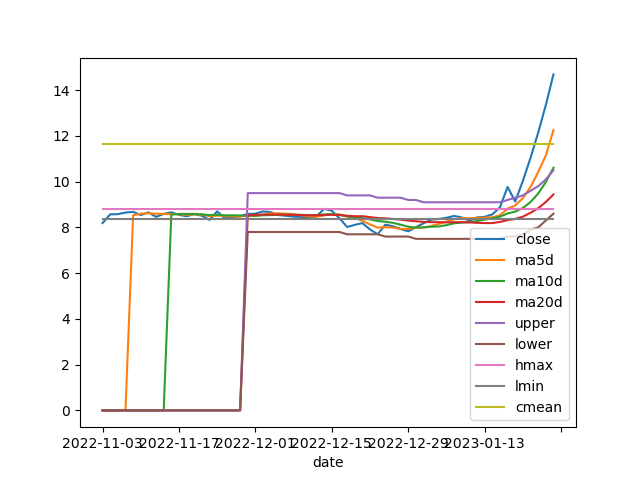

In [54]:
code
tdf = tdd.get_tdx_Exp_day_to_df(code, dl=60).sort_index(ascending=True)
# cname = tdd.get_sina_data_code(code)
# plt.title(
#     stock_code + " | " + cname + " | " + str(quotes.index[-1])[: 10],
#     fontsize=14)
tdf.loc[:, ["close", "ma5d", "ma10d", "ma20d",
            "upper", "lower", "hmax", 'lmin', 'cmean']].plot()

In [55]:
tdf[tdf.columns[(tdf.columns >= "perc1d") & (tdf.columns <= "perc9d")]][-1:]

,perc1d,perc2d,perc3d,perc4d,perc5d,perc6d,perc7d,perc8d,perc9d
date,,,,,,,,,
2023-02-02,1.1,1.1,1.1,1.1,1.0,1.0,1.1,1.1,1.1


In [63]:
tdf[tdf.columns[(tdf.columns >= "per1d") & (tdf.columns <= "per9d")]][-1:]

,per1d,per2d,per3d,per4d,per5d,per6d,per7d,per8d,per9d
date,,,,,,,,,
2023-02-02,10.0,10.0,10.0,10.0,10.0,-6.6,10.0,3.6,1.3
